# 110. 平衡二叉树
简单
相关标签
相关企业
给定一个二叉树，判断它是否是 
平衡二叉树
  

 

示例 1：

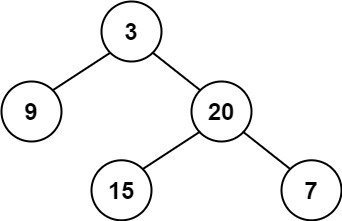

输入：root = [3,9,20,null,null,15,7]
输出：true
示例 2：

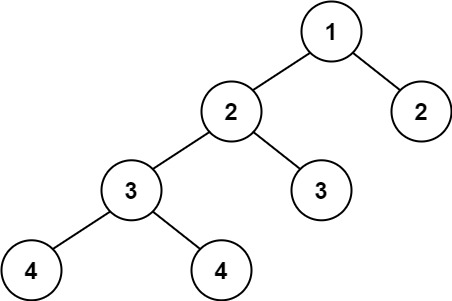

输入：root = [1,2,2,3,3,null,null,4,4]
输出：false
示例 3：

输入：root = []
输出：true
 

提示：

树中的节点数在范围 [0, 5000] 内
-104 <= Node.val <= 104

In [ ]:
import collections

class Solution(object):
    def maxDepth(self, root):
        """
        :type root: TreeNode
        :rtype: int
        """
        if not root:
            return 0
        queue = collections.deque([root])
        depth = 0
        while queue:
            for i in range(len(queue)):
                node = queue.popleft()
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
            depth += 1
        return depth
    
    def isBalanced(self, root):
        """
        :type root: TreeNode
        :rtype: bool
        """
        if not root:
            return True
        
        queue = collections.deque([root])
        while queue:
            node = queue.popleft()
            # 判断当前节点的左右子树深度差是否超过1
            if abs(self.maxDepth(node.left) - self.maxDepth(node.right)) > 1:
                return False
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
        
        return True


In [ ]:
# 递归是从下向上，不会存在重复情况
class Solution(object):
    def isBalanced(self, root):
        """
        :type root: TreeNode
        :rtype: bool
        """
        def check_balance(node):
            if not node:
                return 0, True
            
            left_depth, left_balanced = check_balance(node.left)
            right_depth, right_balanced = check_balance(node.right)
            
            balanced = left_balanced and right_balanced and abs(left_depth - right_depth) <= 1
            return max(left_depth, right_depth) + 1, balanced
        
        _, balanced = check_balance(root)
        return balanced
